In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply

# Machine Learning libraries
## Pre Processing
from sklearn.preprocessing import *
from sklearn.model_selection import *

## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Metrics
from sklearn.metrics import *

## validation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [2]:
df_copy = pd.read_csv("heart_2020_cleaned.csv")

In [13]:
df_copy.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Severity
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,2,5.0,3
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,Yes,2,7.0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,4,8.0,2
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,3,6.0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,Yes,2,8.0,0


In [58]:
df_copy.BMI.describe()


count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

In [3]:
df_copy.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [4]:
df_copy.GenHealth = df_copy.GenHealth.replace(["Poor", "Fair", "Good", "Very good", "Excellent"], [5, 4, 3, 2, 1])

In [5]:
df_copy.GenHealth.value_counts()

2    113858
3     93129
1     66842
4     34677
5     11289
Name: GenHealth, dtype: int64

In [6]:
df_copy = df_copy.drop("Race", axis=1)

In [7]:
df_copy.Diabetic = df_copy.Diabetic.replace(["No, borderline diabetes", "Yes (during pregnancy)"], ["No", "No"])

In [8]:
df_copy.Diabetic = df_copy.Diabetic.replace(["Yes", "No"], [1, 0])
df_copy.Asthma = df_copy.Asthma.replace(["Yes", "No"], [1, 0])
df_copy.KidneyDisease = df_copy.KidneyDisease.replace(["Yes", "No"], [1, 0])
df_copy.SkinCancer = df_copy.SkinCancer.replace(["Yes", "No"], [1, 0])

In [9]:
print(df_copy.Diabetic.value_counts())
print(df_copy.Asthma.value_counts())
print(df_copy.KidneyDisease.value_counts())
print(df_copy["SkinCancer"].value_counts())

0    278993
1     40802
Name: Diabetic, dtype: int64
0    276923
1     42872
Name: Asthma, dtype: int64
0    308016
1     11779
Name: KidneyDisease, dtype: int64
0    289976
1     29819
Name: SkinCancer, dtype: int64


In [10]:
df_copy['Severity'] = df_copy["Diabetic"] + df_copy['Asthma'] + df_copy['KidneyDisease'] + df_copy["SkinCancer"] # Creating New Column Severity based on number of diseases Patient have

In [11]:
df_copy = df_copy.drop(['Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [14]:
df_copy.SleepTime.value_counts()

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64

In [20]:
slpdict = {}
for i,j in zip(range(1, 24), reversed(range(24))):
    slpdict[i] = j

In [24]:
df_copy.SleepTime = df_copy.SleepTime.replace(slpdict)

In [25]:
df = df_copy

In [26]:
df["id"]=range(1,319796)
df=df.set_index("id")

In [27]:
df_cat=df.select_dtypes(include=["object"])

In [28]:
df_categorical=df_cat.columns
df_categorical

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'PhysicalActivity'],
      dtype='object')

In [29]:
for var in df_categorical:
    Dummy=pd.get_dummies(df[var], drop_first= True).add_prefix(var)
    df=df.merge(Dummy,on="id")
    df=df.drop([var],axis=1)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()
columns=df.columns
s=scaler.fit_transform(df)

df=pd.DataFrame(s,columns=columns)
df.head(5)

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,Severity,HeartDiseaseYes,SmokingYes,AlcoholDrinkingYes,StrokeYes,...,AgeCategory40-44,AgeCategory45-49,AgeCategory50-54,AgeCategory55-59,AgeCategory60-64,AgeCategory65-69,AgeCategory70-74,AgeCategory75-79,AgeCategory80 or older,PhysicalActivityYes
0,0.055294,0.100000,1.0,0.25,0.782609,0.75,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.100447,0.000000,0.0,0.25,0.695652,0.00,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.175782,0.666667,1.0,0.75,0.652174,0.50,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.147169,0.000000,0.0,0.50,0.739130,0.25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.141132,0.933333,0.0,0.25,0.652174,0.00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
stratified_sample = df.groupby('HeartDiseaseYes', group_keys=False).apply(lambda x: x.sample(7500))

X_test = stratified_sample.drop("HeartDiseaseYes", axis=1)
y_test= stratified_sample.HeartDiseaseYes

In [33]:
df_stratified = pd.concat((X_test,y_test), axis=1)
df_stratified["HeartDiseaseYes"].value_counts()

0.0    7500
1.0    7500
Name: HeartDiseaseYes, dtype: int64

In [34]:
df_all = df.merge(df_stratified.drop_duplicates(), on= ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'SmokingYes',
       'AlcoholDrinkingYes', 'StrokeYes', 'DiffWalkingYes', 'SexMale',
       'AgeCategory25-29',
       'AgeCategory30-34', 'AgeCategory35-39', 'AgeCategory40-44',
       'AgeCategory45-49', 'AgeCategory50-54', 'AgeCategory55-59',
       'AgeCategory60-64', 'AgeCategory65-69', 'AgeCategory70-74',
       'AgeCategory75-79', 'AgeCategory80 or older','PhysicalActivityYes','GenHealth',
       'Severity', 'HeartDiseaseYes'], how="left", indicator='True')

train_dataset = df_all[df_all['True'] == 'left_only']

X_train = train_dataset.drop(["HeartDiseaseYes", "True"], axis=1)
y_train = train_dataset.HeartDiseaseYes

In [35]:
print(y_train.value_counts())
y_test.value_counts()

0.0    282763
1.0     19809
Name: HeartDiseaseYes, dtype: int64


0.0    7500
1.0    7500
Name: HeartDiseaseYes, dtype: int64

In [36]:
X_train.head(1)

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,Severity,SmokingYes,AlcoholDrinkingYes,StrokeYes,DiffWalkingYes,...,AgeCategory40-44,AgeCategory45-49,AgeCategory50-54,AgeCategory55-59,AgeCategory60-64,AgeCategory65-69,AgeCategory70-74,AgeCategory75-79,AgeCategory80 or older,PhysicalActivityYes
1,0.100447,0.0,0.0,0.25,0.695652,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [37]:
X_train.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'SleepTime',
       'Severity', 'SmokingYes', 'AlcoholDrinkingYes', 'StrokeYes',
       'DiffWalkingYes', 'SexMale', 'AgeCategory25-29', 'AgeCategory30-34',
       'AgeCategory35-39', 'AgeCategory40-44', 'AgeCategory45-49',
       'AgeCategory50-54', 'AgeCategory55-59', 'AgeCategory60-64',
       'AgeCategory65-69', 'AgeCategory70-74', 'AgeCategory75-79',
       'AgeCategory80 or older', 'PhysicalActivityYes'],
      dtype='object')

<a id="33"></a>

<font color='black'>

## MODEL 3

In [38]:
logreg = LogisticRegression(class_weight = {0: 1, 1: 14})
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob = list(pd.DataFrame(y_pred_prob)[1])
y_pred_FE = [0 if x < 0.5 else 1 for x in y_pred_prob]

In [39]:
score_card_FE = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])


score_card_FE = score_card_FE.append({'Probability Cutoff': 0.5,
                                'AUC Score' : roc_auc_score(y_test, y_pred_FE),
                                'Precision Score': precision_score(y_test, y_pred_FE),
                                'Recall Score': recall_score(y_test, y_pred_FE),
                                'Accuracy Score': accuracy_score(y_test, y_pred_FE),
                                'Kappa Score':cohen_kappa_score(y_test, y_pred_FE),
                                'f1-score': f1_score(y_test, y_pred_FE)}, 
                                ignore_index = True)
score_card_FE                                

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.5,0.762667,0.756444,0.7748,0.762667,0.525333,0.765512


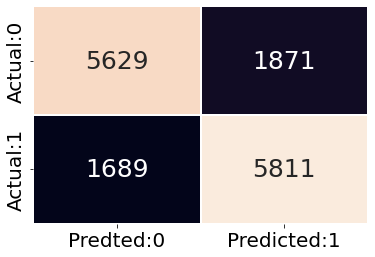

In [40]:
cm = confusion_matrix(y_test, y_pred_FE)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

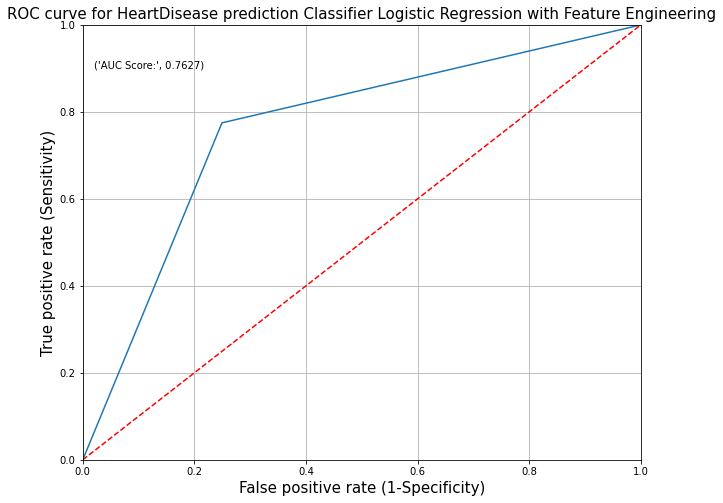

In [41]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_FE)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for HeartDisease prediction Classifier Logistic Regression with Feature Engineering', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_FE),4)))
                               
plt.grid(True)

<a id="38"></a>

<font color='black'>

## MODEL 4

<a id="34"></a>

<font color='black'>

## STACKING ALGORITHM

In [45]:
from sklearn.ensemble import StackingClassifier


level0 = list()
level0.append(('lr', LogisticRegression(class_weight= {0:1, 1:14})))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression(class_weight= {0:1, 1:14})

# define the stacking ensemble
stc = StackingClassifier(estimators=level0, final_estimator=level1, cv=20)

# fit the model on all available data
stc.fit(X_train, y_train)

# make a prediction for one example
y_pred_stack = stc.predict_proba(X_test)
y_pred_stack = list(pd.DataFrame(y_pred_stack)[1])
y_pred_stack = [0 if x < 0.5 else 1 for x in y_pred_stack]


score_card_stack = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

score_card_stack = score_card_stack.append({'Probability Cutoff': 0.4,
                                'AUC Score' : roc_auc_score(y_test, y_pred_stack),
                                'Precision Score': precision_score(y_test, y_pred_stack),
                                'Recall Score': recall_score(y_test, y_pred_stack),
                                'Accuracy Score': accuracy_score(y_test, y_pred_stack),
                                'Kappa Score':cohen_kappa_score(y_test, y_pred_stack),
                                'f1-score': f1_score(y_test, y_pred_stack)}, 
                                ignore_index = True)
score_card_stack  

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.4,0.761733,0.757612,0.769733,0.761733,0.523467,0.763624


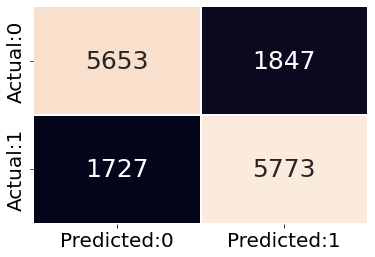

In [46]:
cm = confusion_matrix(y_test, y_pred_stack)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [47]:
y_pred_stack

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,


In [51]:
pd.set_option('display.max_columns', None)

In [56]:
X_test.iloc[1,:]

BMI                       0.180369
PhysicalHealth            0.000000
MentalHealth              0.100000
GenHealth                 0.250000
SleepTime                 0.739130
Severity                  0.000000
SmokingYes                0.000000
AlcoholDrinkingYes        0.000000
StrokeYes                 0.000000
DiffWalkingYes            0.000000
SexMale                   1.000000
AgeCategory25-29          0.000000
AgeCategory30-34          0.000000
AgeCategory35-39          0.000000
AgeCategory40-44          0.000000
AgeCategory45-49          0.000000
AgeCategory50-54          1.000000
AgeCategory55-59          0.000000
AgeCategory60-64          0.000000
AgeCategory65-69          0.000000
AgeCategory70-74          0.000000
AgeCategory75-79          0.000000
AgeCategory80 or older    0.000000
PhysicalActivityYes       1.000000
Name: 253522, dtype: float64

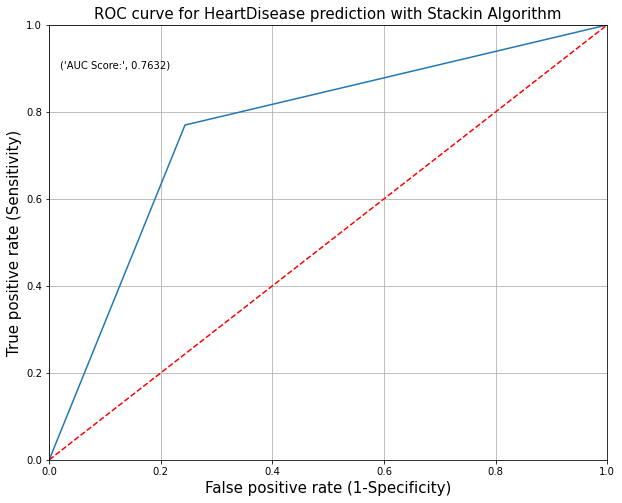

In [ ]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_stack)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for HeartDisease prediction with Stackin Algorithm', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_stack),4)))
                               
plt.grid(True)